### Sample the posterior $P(\theta|X)$ from `SEDflow` dataproduct. Don't do this on GPU!

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pickle
import corner
import numpy as np
import matplotlib.pyplot as plt
import h5py
from astropy.table import Table

os.chdir('/scratch/gpfs/jiaxuanl/Data/popsed/')
sys.path.append('/home/jiaxuanl/Research/popsed/')
import popsed
popsed.set_matplotlib(style='JL', usetex=False, dpi=80)

In [3]:
f = h5py.File('./nsa_sedflow/nsa.sedflow.v0.2.hdf5', 'r')

In [4]:
# print data columns
print(f.keys())

<KeysViewHDF5 ['NSAID', 'beta1', 'beta2', 'beta3', 'beta4', 'fburst', 'log_gamma1', 'log_gamma2', 'log_mstar', 'log_sfr_1gyr', 'log_z_mw', 'mag_g', 'mag_i', 'mag_r', 'mag_u', 'mag_z', 'n_dust', 'redshift', 'sedflow', 'sigma_g', 'sigma_i', 'sigma_r', 'sigma_u', 'sigma_z', 'tau_bc', 'tau_ism', 'tburst']>


In [5]:
# read data
logm = f['log_mstar'][...]
beta1 = f['beta1'][...]
beta2 = f['beta2'][...]
beta3 = f['beta3'][...]
beta4 = f['beta4'][...]
fburst = f['fburst'][...]
tburst = f['tburst'][...]
logzsol = f['log_z_mw'][...]
dust1 = f['tau_bc'][...]
dust2 = f['tau_ism'][...]
dust_index = f['n_dust'][...]

redshift = f['redshift'][...]
# redshift = np.repeat(redshift[:, None], logm.shape[1], axis=1)

In [7]:
ind = np.random.randint(0, 10000, size=(12))

In [20]:
data = np.vstack([beta1[:, ind].ravel(), 
                  beta2[:, ind].ravel(), 
                  beta3[:, ind].ravel(), 
                  beta4[:, ind].ravel()]).T

In [12]:
from popsed.prior import FlatDirichletPrior

In [21]:
data[0:1]

array([[0.6232342 , 0.16268742, 0.01288767, 0.2011907 ]], dtype=float32)

In [24]:
data_kappa = FlatDirichletPrior(4).untransform(data)

In [31]:
ind = np.random.randint(0, 406608, size=(10000))

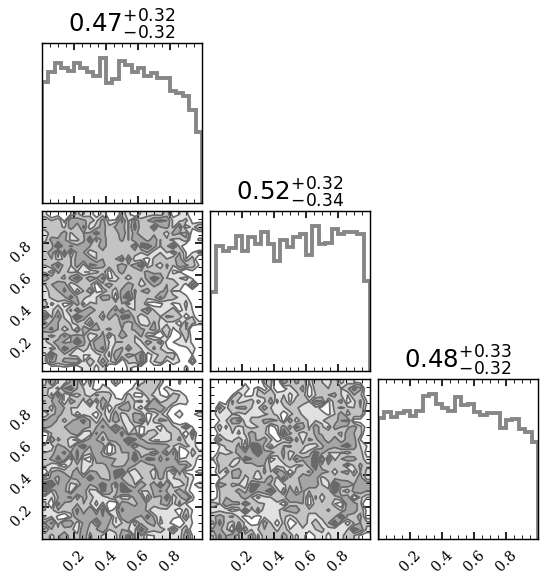

In [33]:
import matplotlib.lines as mlines


figure = corner.corner(
    data_kappa[ind],
    color='dimgray',
#     labels=labels,
    bins=25,
#     smooth=1.5,
    fill_contours=True,
    show_titles=True,
#     title_fmt=None,
    title_kwargs={'fontsize': 22},
    label_kwargs={'fontsize': 26},
    labelpad=0.15,
    hist_kwargs={'density': True},
    plot_datapoints=False
    )

In [17]:


sedflow = np.vstack([np.median(beta1, axis=1), 
           np.median(beta2, axis=1), 
           np.median(beta3, axis=1), 
           np.median(beta4, axis=1), 
           np.median(fburst, axis=1), 
           np.median(tburst, axis=1), 
           np.median(logzsol, axis=1), 
           np.median(dust1, axis=1), 
           np.median(dust2, axis=1), 
           np.median(dust_index, axis=1), 
           redshift,
                    np.median(logm, axis=1)])

In [22]:
ind = 10

In [23]:
sedflow[:, ind]

array([ 0.3267873 ,  0.24704504,  0.10694773,  0.10339665,  0.6897544 ,
        8.246036  , -2.590552  ,  1.3661929 ,  1.1196978 ,  0.3621066 ,
        0.03587863, 10.196263  ], dtype=float32)

In [20]:
mags = np.vstack([f['mag_u'][...], f['mag_g'][...], f['mag_r'][...], f['mag_i'][...], f['mag_z'][...]])

In [24]:
mags[:, ind]

array([19.214428, 17.8736  , 17.14103 , 16.76466 , 16.484669],
      dtype=float32)

In [ ]:
['kappa1_sfh', 'kappa2_sfh', 'kappa3_sfh', 
                 'fburst', 'tburst', 'logzsol', 'dust1', 'dust2', 
                 'dust_index', 'redshift']

In [15]:
ind = np.random.randint(0, 10000, size=(12))

In [18]:
data = np.vstack([beta1[:, ind].ravel(), 
                  beta2[:, ind].ravel(), 
                  beta3[:, ind].ravel(), 
                  beta4[:, ind].ravel(), 
                  fburst[:, ind].ravel(), 
                  tburst[:, ind].ravel(), 
                  logzsol[:, ind].ravel(), 
                  dust1[:, ind].ravel(), 
                  dust2[:, ind].ravel(), 
                  dust_index[:, ind].ravel(), 
                  redshift[:, ind].ravel(),
                  logm[:, ind].ravel()]).T

In [96]:
np.save('./nsa_sedflow/params_posterior.npy', data)

In [19]:
labels = ['beta1\\_sfh', 
          'beta2\\_sfh',
          'beta3\\_sfh',
          'beta4\\_sfh',
 'fburst',
 'tburst',
 'logzsol',
 'dust1',
 'dust2',
 'dust\\_index',
 'redshift',
 'logm']

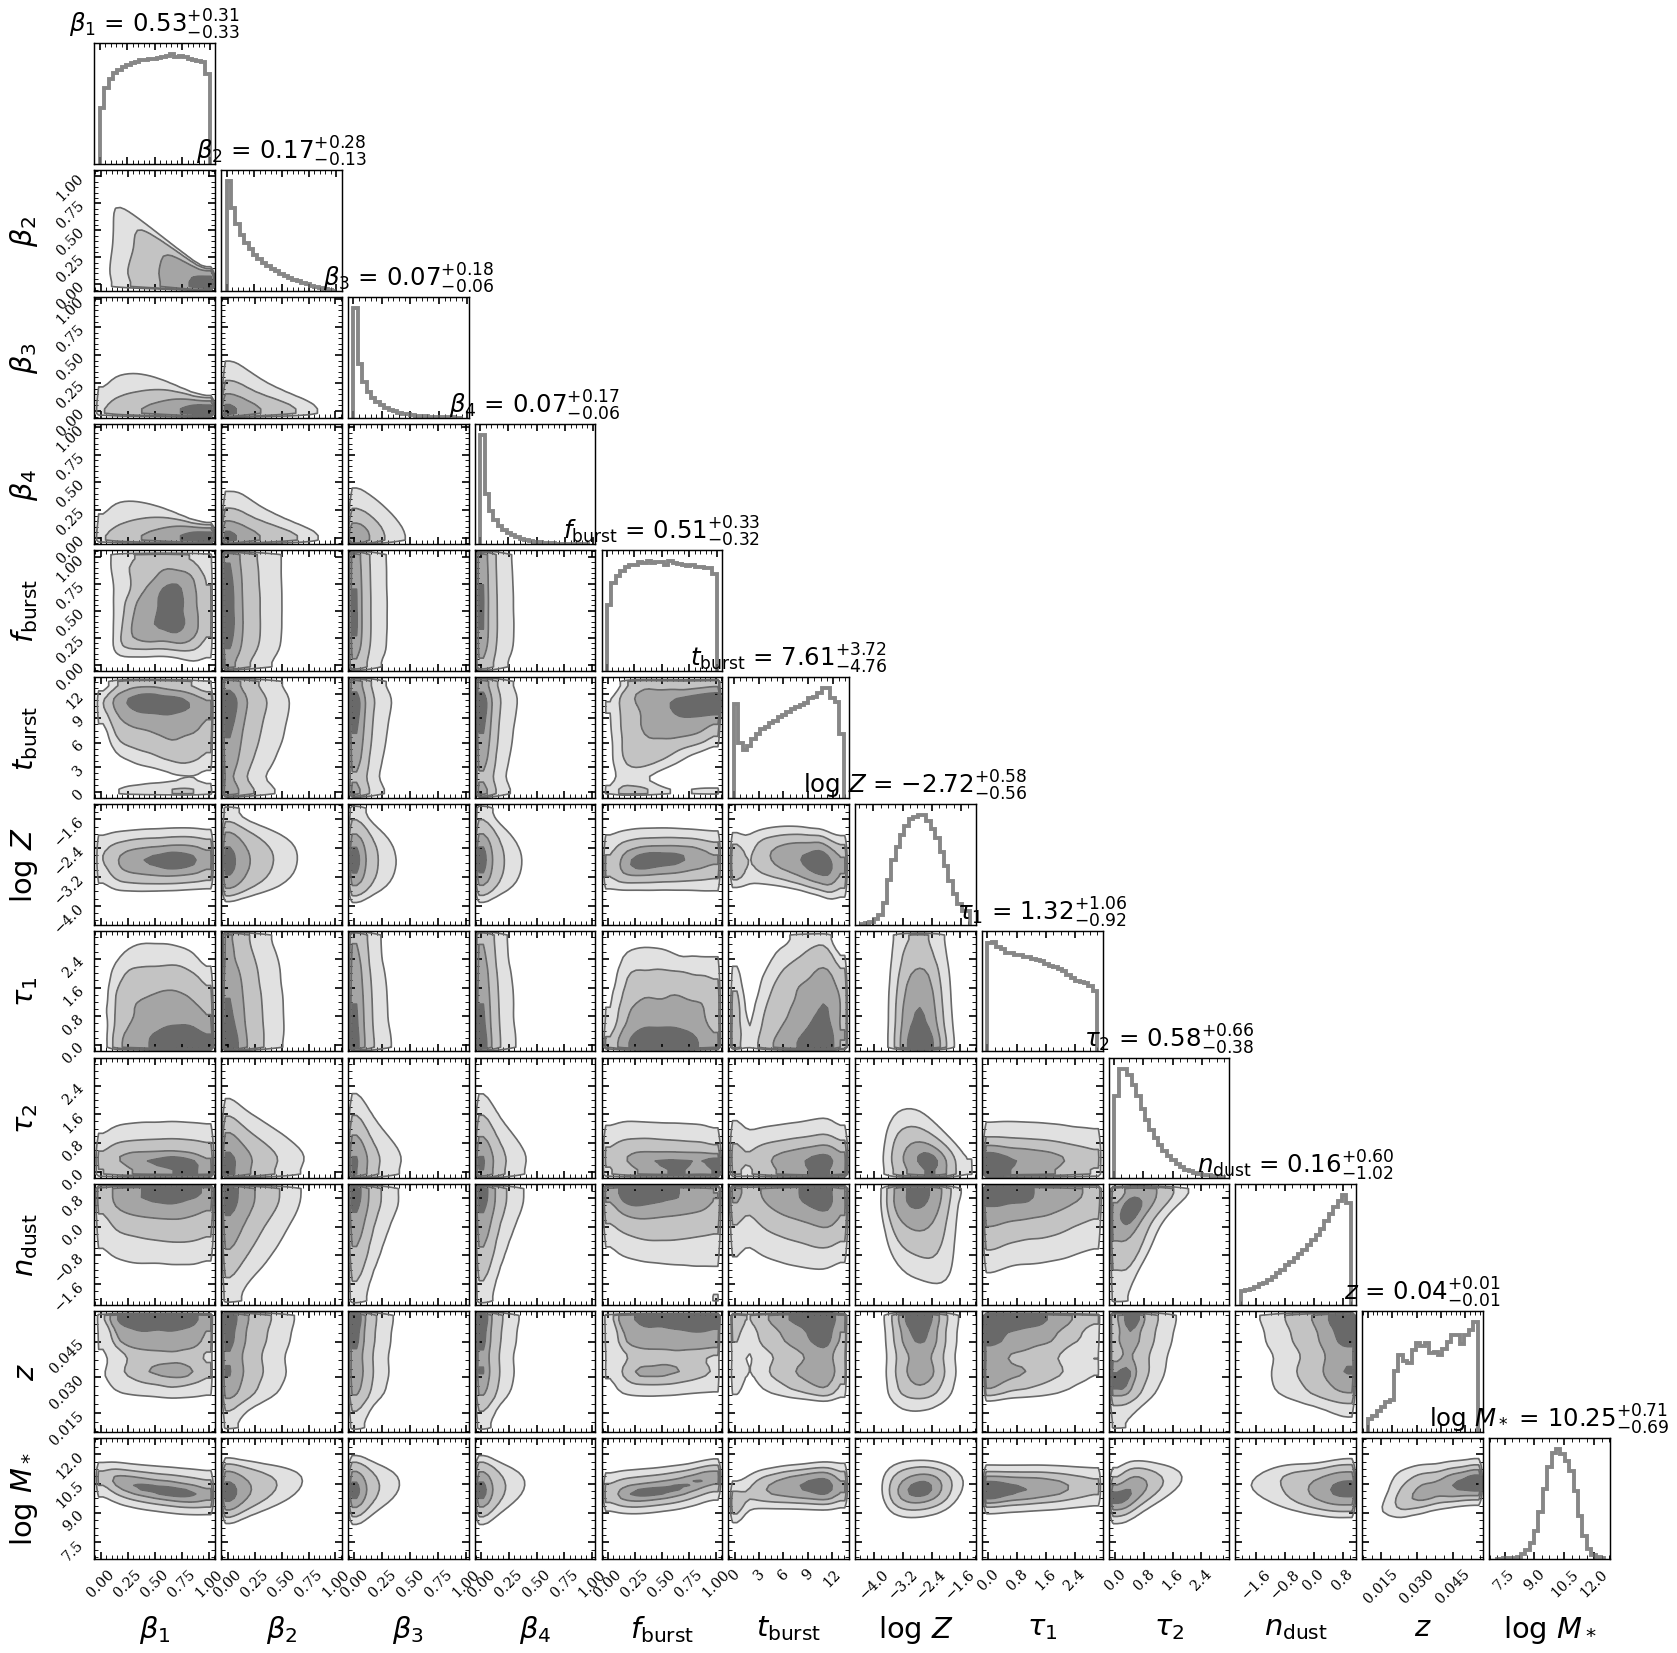

In [63]:
import matplotlib.lines as mlines

labels = [
    r'$\beta_{1}$',
    r'$\beta_{2}$',
    r'$\beta_{3}$',
    r'$\beta_{4}$',
    r'$f_{\mathrm{burst}}$',
    r'$t_{\mathrm{burst}}$',
    r'$\log\,Z$',
    r'$\tau_1$',
    r'$\tau_2$',
    r'$n_{\mathrm{dust}}$',
    r'$z$',
    r'$\log\,M_*$',
    ]

figure, axes = plt.subplots(12, 12, figsize=(20, 20))
figure = corner.corner(
    data,
    fig=figure,
    color='dimgray',
    labels=labels,
    bins=25,
    smooth=1.5,
    fill_contours=True,
    show_titles=True,
#     title_fmt=None,
    title_kwargs={'fontsize': 22},
    label_kwargs={'fontsize': 26},
    labelpad=0.15,
    hist_kwargs={'density': True},
    plot_datapoints=False
    )

In [43]:
ids = f['NSAID'][...]

In [ ]:
# nsa_cat = Table.read('./reference_catalog/nsa_v1_0_1.fits')
# nsa_cat = Table.read('./reference_catalog/nsa_v0_1_2.fits')
# try to match nsa_cat with Chang's selection
# flag = np.in1d(nsa_cat['NSAID'].data, ids)
# nsa_cat = nsa_cat[flag]
# nsa_cat[flag].write('./reference_catalog/nsa_cleaned.fits')

In [6]:
mag_data = np.vstack([f[f'mag_{filt}'][...] for filt in 'ugriz'])

In [7]:
np.save('./nsa_sedflow/nsa_mag_data.npy', mag_data)

In [14]:
sigma_mag_data = np.vstack([f[f'sigma_{filt}'][...] for filt in 'ugriz'])

In [15]:
np.save('./nsa_sedflow/nsa_mag_err_data.npy', sigma_mag_data)

In [18]:
np.save('./nsa_sedflow/nsa_redshift.npy', f['redshift'][...])

In [10]:
np.save('./nsa_sedflow/nsa_logm_median.npy', np.median(logm, axis=1))

### Check Chang's combined posterior based on normalizing flow

In [4]:
from popsed import prior

In [32]:
sample = np.load('./nsa_sedflow/nsa_sedflow.posterior_combined.npy')
# redshift = f['redshift'][...]
redshift = sample[:, -1].astype(float)
sample = np.hstack([sample[:, 0:1], prior.FlatDirichletPrior(4).transform(sample[:, 1:4]), 
                    sample[:, 4:6], 10**sample[:, 6:8], sample[:, 8:-1]]) # not include redshift

In [27]:
sample[0]

array([1.05866270e+01, 2.43110538e-01, 3.64393532e-01, 2.89552510e-01,
       1.02943428e-01, 6.66285694e-01, 9.79760647e+00, 5.26207550e-05,
       4.57223301e-04, 4.52431560e-01, 6.58912838e-01, 4.52336669e-01])

In [29]:
from popsed.models import NMF_ZH
nmf = NMF_ZH()
nmf._load_NMF_bases()

Initialize NMF-based SPS model
Input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [30]:
nmf._parse_theta(sample[10])

{'logmstar': array([9.97377205]),
 'beta1_sfh': array([0.13683271]),
 'beta2_sfh': array([0.53883904]),
 'beta3_sfh': array([0.20265622]),
 'beta4_sfh': array([0.121672]),
 'fburst': array([0.62717521]),
 'tburst': array([9.25575638]),
 'gamma1_zh': array([0.00032066]),
 'gamma2_zh': array([0.00021951]),
 'dust1': array([0.45466894]),
 'dust2': array([0.3481417]),
 'dust_index': array([-0.57874316])}

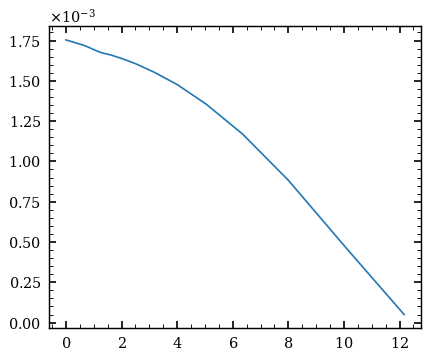

In [33]:
t = nmf.SFH(sample[10], zred=redshift[10])[0]
plt.plot(0.5 * (t[:-1] + t[1:]), nmf.ZH(sample[10], zred=0.01)[1])

In [34]:
np.log10(nmf.Z_MW(sample[10], zred=redshift[10]))

array([-3.15430423])

In [35]:
z_mw_list = [np.log10(nmf.Z_MW(sample[i], zred=redshift[i])) for i in range(10000)]
z_mw_list = np.array(z_mw_list).ravel() - (np.log10(0.0134))

In [41]:
sample = np.load('./nsa_sedflow/nsa_sedflow.posterior_combined.npy')
sample = np.hstack([prior.FlatDirichletPrior(4).transform(sample[:, 1:4]), 
                    sample[:, 4:6], z_mw_list[:, None], sample[:, 8:-1],
                    sample[:, -1:], sample[:, 0:1]])

In [42]:
sample.shape

(10000, 12)

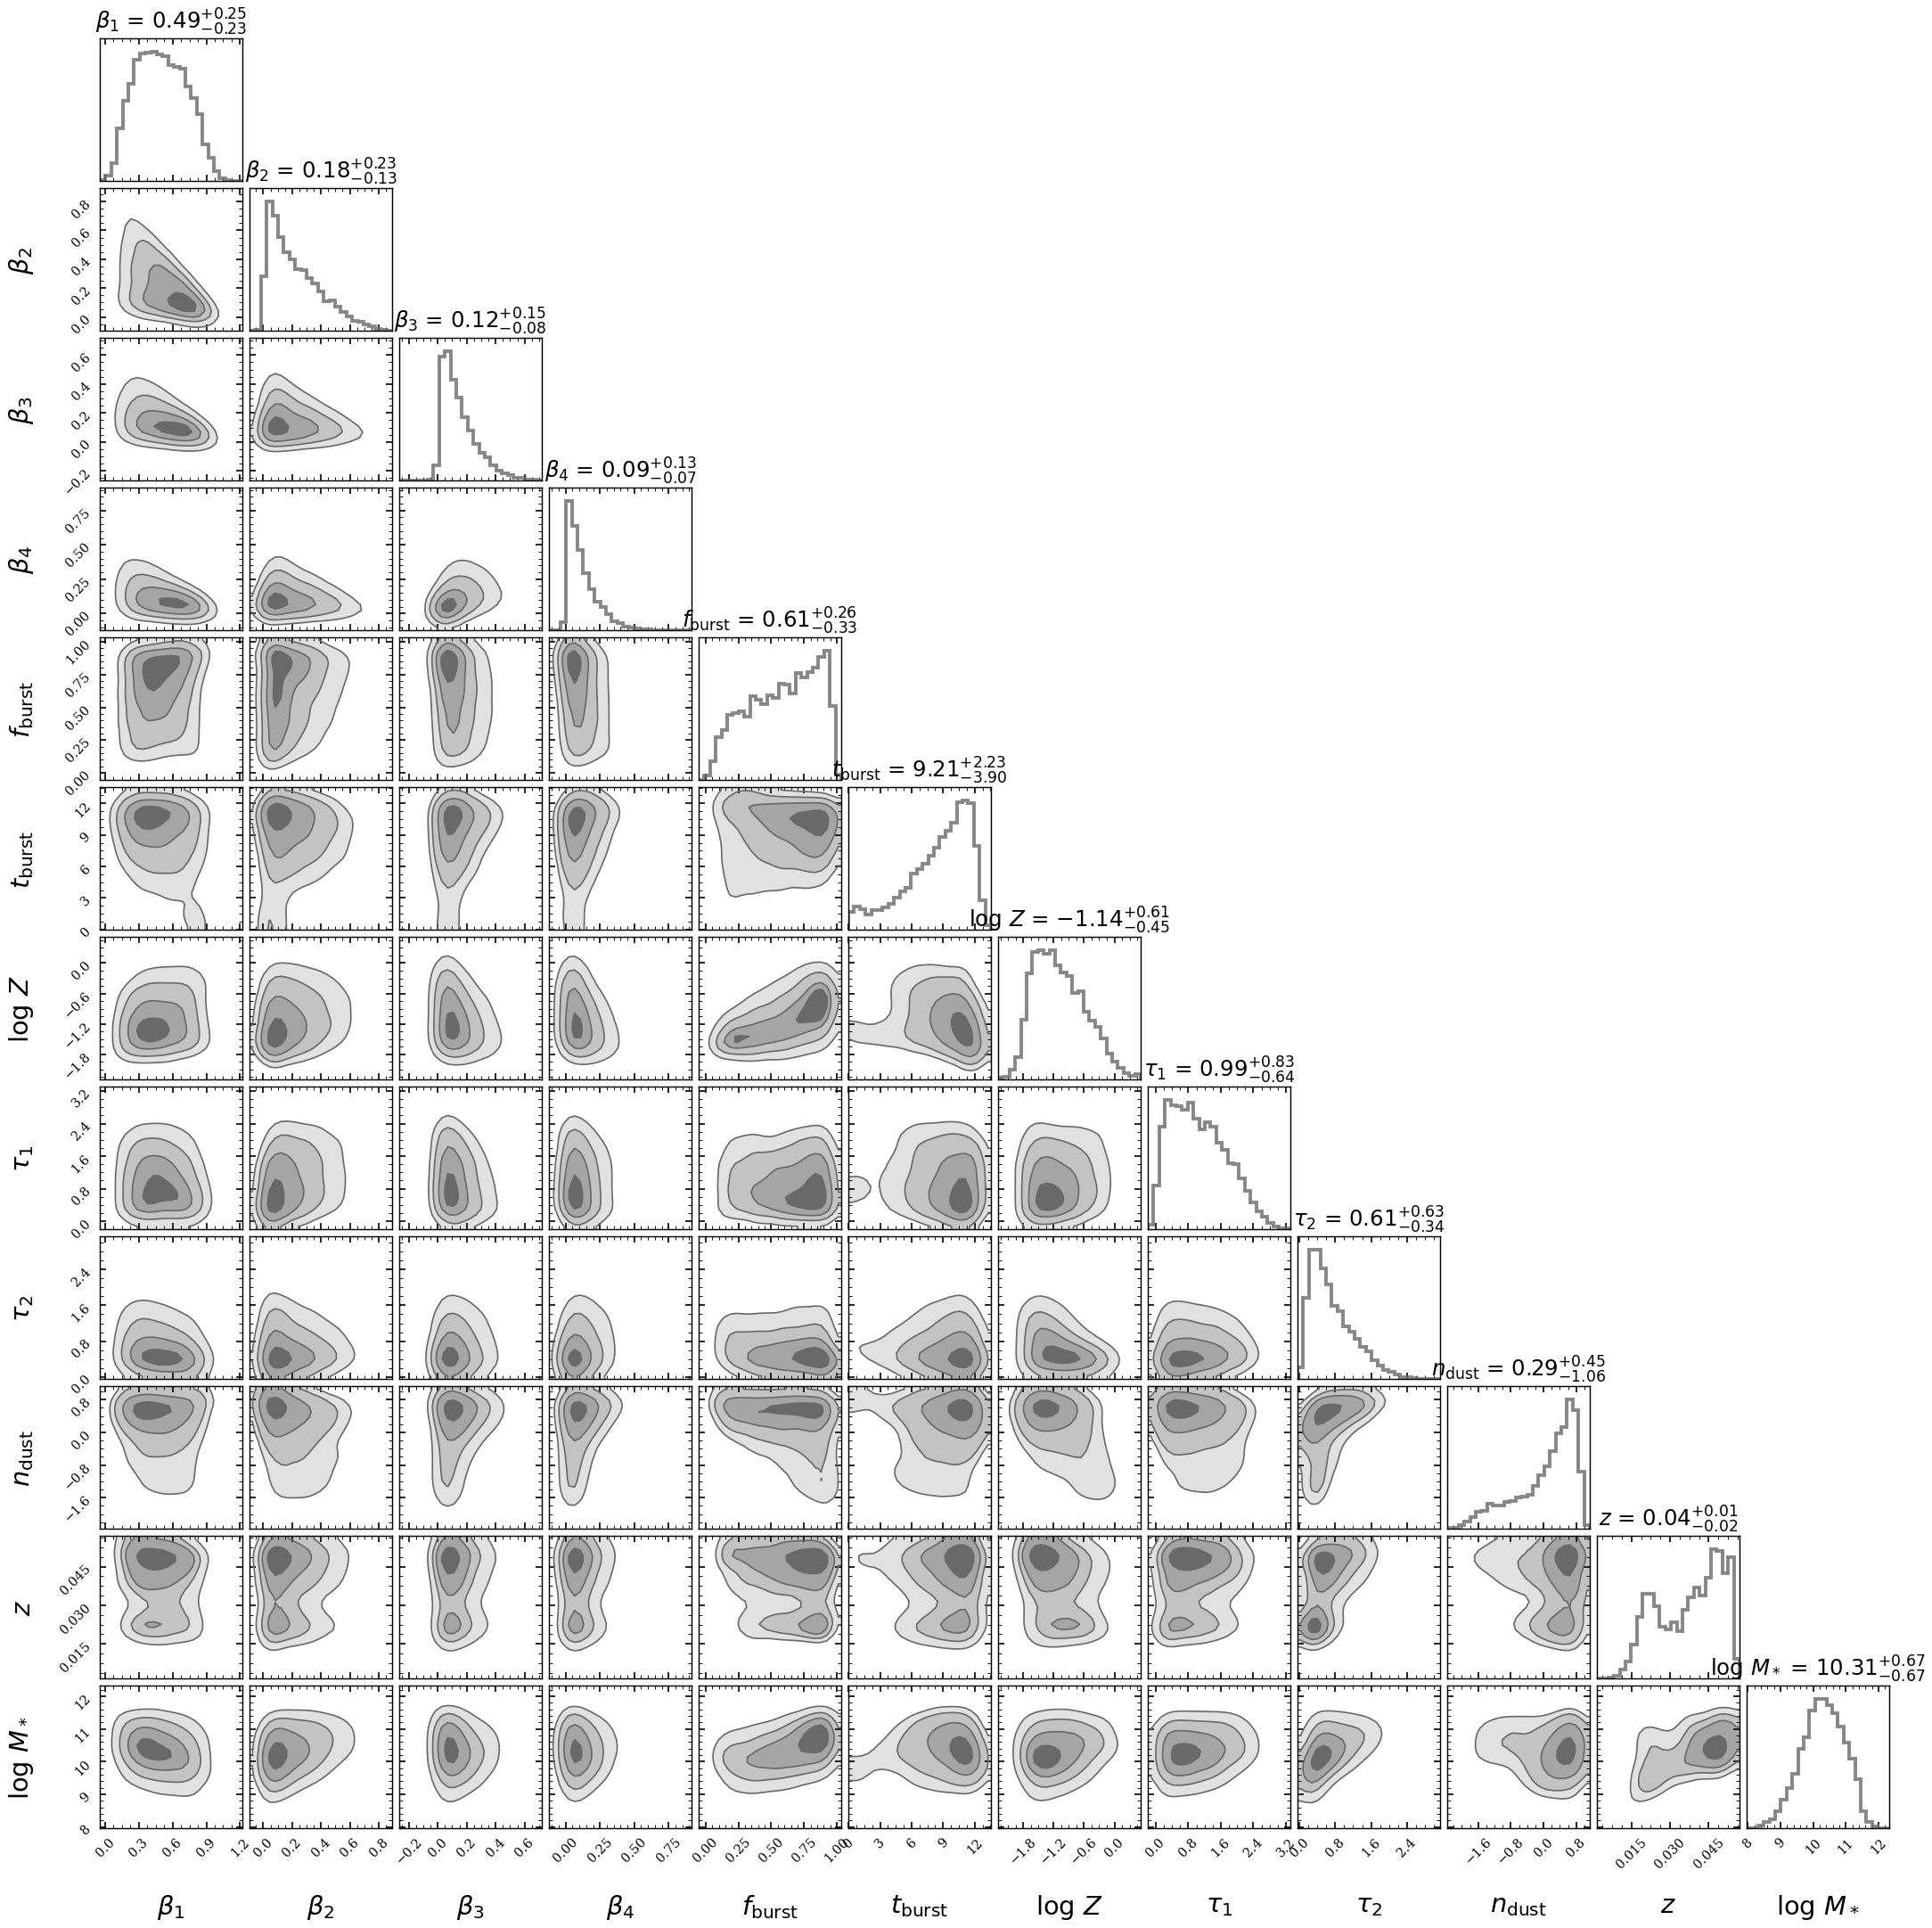

In [43]:
import matplotlib.lines as mlines

labels = [
    r'$\beta_{1}$',
    r'$\beta_{2}$',
    r'$\beta_{3}$',
    r'$\beta_{4}$',
    r'$f_{\mathrm{burst}}$',
    r'$t_{\mathrm{burst}}$',
    r'$\log\,Z$',
    r'$\tau_1$',
    r'$\tau_2$',
    r'$n_{\mathrm{dust}}$',
    r'$z$',
    r'$\log\,M_*$',
    ]

# figure, axes = plt.subplots(12, 12, figsize=(20, 20))
figure = corner.corner(
    sample,
#     fig=figure,
    color='dimgray',
    labels=labels,
    bins=25,
    smooth=1.5,
    fill_contours=True,
    show_titles=True,
#     title_fmt=None,
    title_kwargs={'fontsize': 22},
    label_kwargs={'fontsize': 26},
    labelpad=0.15,
    hist_kwargs={'density': True},
    plot_datapoints=False
    )

In [46]:
np.save('./nsa_sedflow/nsa_sedflow.posterior.reorganized.npy', sample)

In [47]:
sample.shape

(10000, 12)

---

### Quality cuts based on NSA

In [43]:
nsa_cat = Table.read('./reference_catalog/nsa_v1_0_1.fits')
# try to match nsa_cat with Chang's selection
# flag = np.in1d(nsa_cat['NSAID'].data, ids)
# nsa_cat = nsa_cat[flag]
# nsa_cat[flag].write('./reference_catalog/nsa_cleaned.fits')

In [44]:
flag = ~np.any(nsa_cat['DFLAGS'].data, axis=1)
nsa_cat = nsa_cat[flag]

In [49]:
from popsed.utils import flux2mag
mag_data = flux2mag(nsa_cat['ELPETRO_FLUX'].data).data[:, 2:] # ugriz 01234

In [57]:
flag = ((mag_data[:, 0] - mag_data[:, 1]) > 0)
flag &= ((mag_data[:, 1] - mag_data[:, 2]) > 0)
flag &= ((mag_data[:, 1] - mag_data[:, 4]) > 0)
flag &= ((mag_data[:, 2] - mag_data[:, 3]) > 0)
flag &= ((mag_data[:, 2] - mag_data[:, 4]) > 0)

In [58]:
mag_data = mag_data[flag]

In [59]:
mag_data.shape

(365544, 5)

In [ ]:
u-g > 0

g-z > 0

r-i > 0

r-z > 0

In [83]:
ind = np.random.choice(range(len(nsa_cat)), size=(30000), replace=False)

In [73]:
np.save('./reference_catalog/nsa_v101_redshift.npy', nsa_cat['ZDIST'].data)

In [93]:
mag_data = flux2mag(nsa_cat[ind]['ELPETRO_FLUX'].data).data
np.save('./reference_catalog/nsa_v101_mag_data.npy', mag_data)

In [78]:
np.save('./reference_catalog/nsa_v101_logm.npy', np.log10(nsa_cat['ELPETRO_MASS'].data).data)

(array([8.800e+01, 1.120e+02, 1.670e+02, 1.980e+02, 2.720e+02, 4.150e+02,
        4.820e+02, 6.280e+02, 7.640e+02, 9.080e+02, 1.100e+03, 1.335e+03,
        1.689e+03, 2.030e+03, 2.464e+03, 2.813e+03, 3.054e+03, 3.348e+03,
        2.875e+03, 2.242e+03, 1.415e+03, 7.360e+02, 3.210e+02, 1.440e+02,
        5.300e+01, 3.100e+01, 6.000e+00, 4.000e+00, 4.000e+00, 1.000e+00]),
 array([ 8.      ,  8.133333,  8.266666,  8.4     ,  8.533334,  8.666667,
         8.8     ,  8.933333,  9.066667,  9.2     ,  9.333333,  9.466666,
         9.6     ,  9.733334,  9.866667, 10.      , 10.133333, 10.266666,
        10.4     , 10.533334, 10.666667, 10.8     , 10.933333, 11.066667,
        11.2     , 11.333333, 11.466666, 11.6     , 11.733334, 11.866667,
        12.      ], dtype=float32),
 <BarContainer object of 30 artists>)

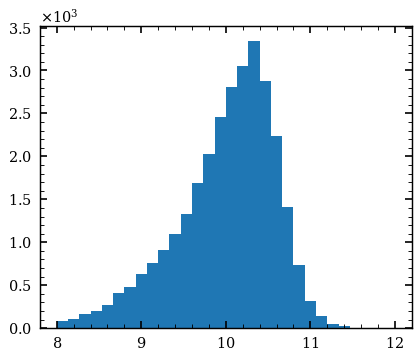

In [87]:
plt.hist(np.log10(nsa_cat[ind]['ELPETRO_MASS']), range=(8, 12), bins=30)

(array([  71.,  228.,  228.,  406.,  656.,  858.,  982.,  897.,  970.,
        1070., 1089., 1050., 1253., 1294., 1390., 1592., 1661., 1423.,
        1220., 1162., 1145., 1217., 1159., 1122., 1014., 1026., 1111.,
         994.,  876.,  836.]),
 array([-0.00186129,  0.00320025,  0.00826178,  0.01332332,  0.01838486,
         0.02344639,  0.02850793,  0.03356947,  0.03863101,  0.04369254,
         0.04875408,  0.05381562,  0.05887716,  0.06393869,  0.06900023,
         0.07406177,  0.0791233 ,  0.08418484,  0.08924638,  0.09430791,
         0.09936945,  0.10443099,  0.10949253,  0.11455406,  0.1196156 ,
         0.12467714,  0.12973867,  0.13480021,  0.13986175,  0.14492328,
         0.14998482], dtype=float32),
 <BarContainer object of 30 artists>)

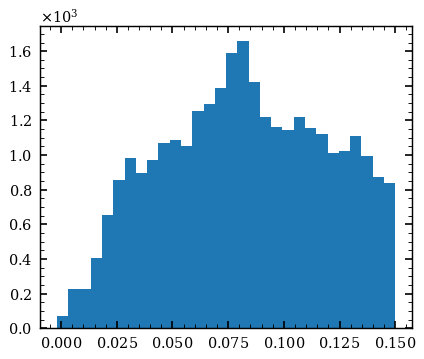

In [88]:
plt.hist(nsa_cat[ind]['Z'], bins=30)

In [79]:
### compare NSA colors with training colors
# nsa_mags = np.load('./reference_catalog/nsa_v101_mag_data.npy')[:, 2:]
train_mags = np.load('./train_sed_NMF/training_mags.npy')

In [80]:
color_combs = list(combinations(range(len(channels)), 2))

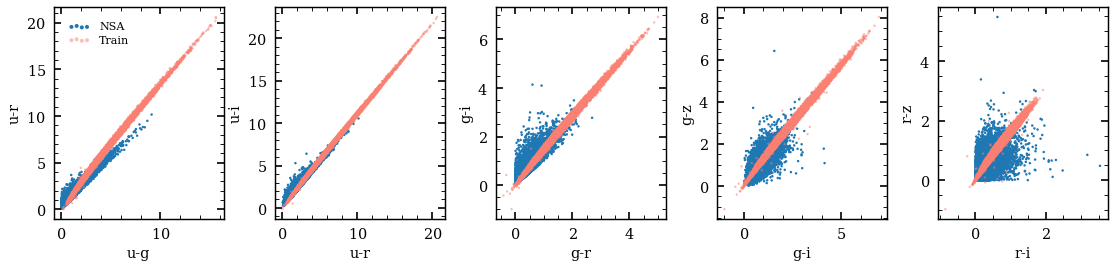

In [82]:
from itertools import combinations
channels = 'ugriz'

fig, axes = plt.subplots(1, 5, figsize=(17, 3.5))

for i, (filt1, filt2) in enumerate(zip([0, 0, 1, 1, 2], [1, 2, 2, 3, 3])):
    plt.sca(axes[i]) 
#     filt2 = filt1 + 1
    _temp = mag_data
    plt.scatter(_temp[:, filt1] - _temp[:, filt2], 
                _temp[:, filt1] - _temp[:, filt2 + 1],
                s=5, edgecolors='none', label='NSA')
    
    _temp = train_mags
    plt.scatter(_temp[:, filt1] - _temp[:, filt2], 
                _temp[:, filt1] - _temp[:, filt2 + 1],
                s=5, edgecolors='none', 
                color='salmon', label='Train', 
                alpha=0.5)
    plt.xlabel(channels[filt1] + '-' + channels[filt2])
    plt.ylabel(channels[filt1] + '-' + channels[filt2 + 1])
    
    if i == 0:
        lgnd = plt.legend(scatterpoints=4, fontsize=10)
        for handle in lgnd.legendHandles:
            handle.set_sizes([13.0])
    
plt.subplots_adjust(wspace=0.3)

In [69]:
import corner

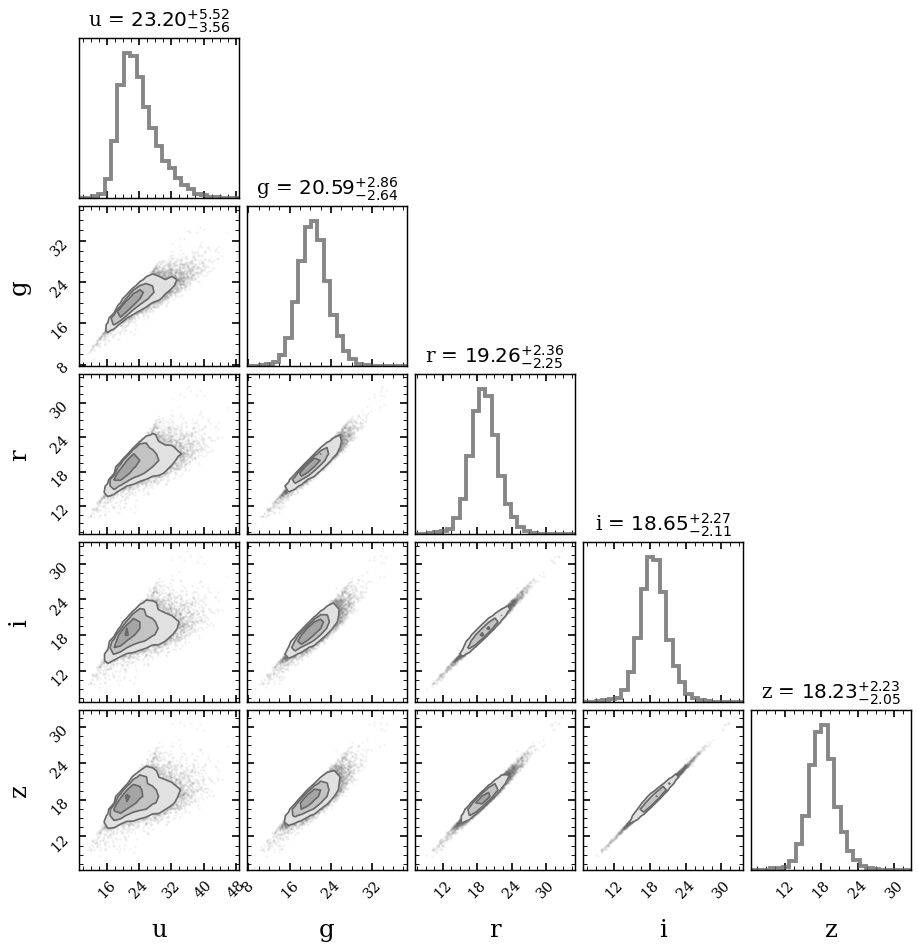

In [81]:
figure = corner.corner(
    train_mags,
    color='dimgray',
    labels=list('ugriz'),
    bins=25,
    smooth=.1,
    fill_contours=True,
    show_titles=True,
    title_kwargs={'fontsize': 18},
    label_kwargs={'fontsize': 22},
    hist_kwargs={'density': True},
    plot_datapoints=True
    )

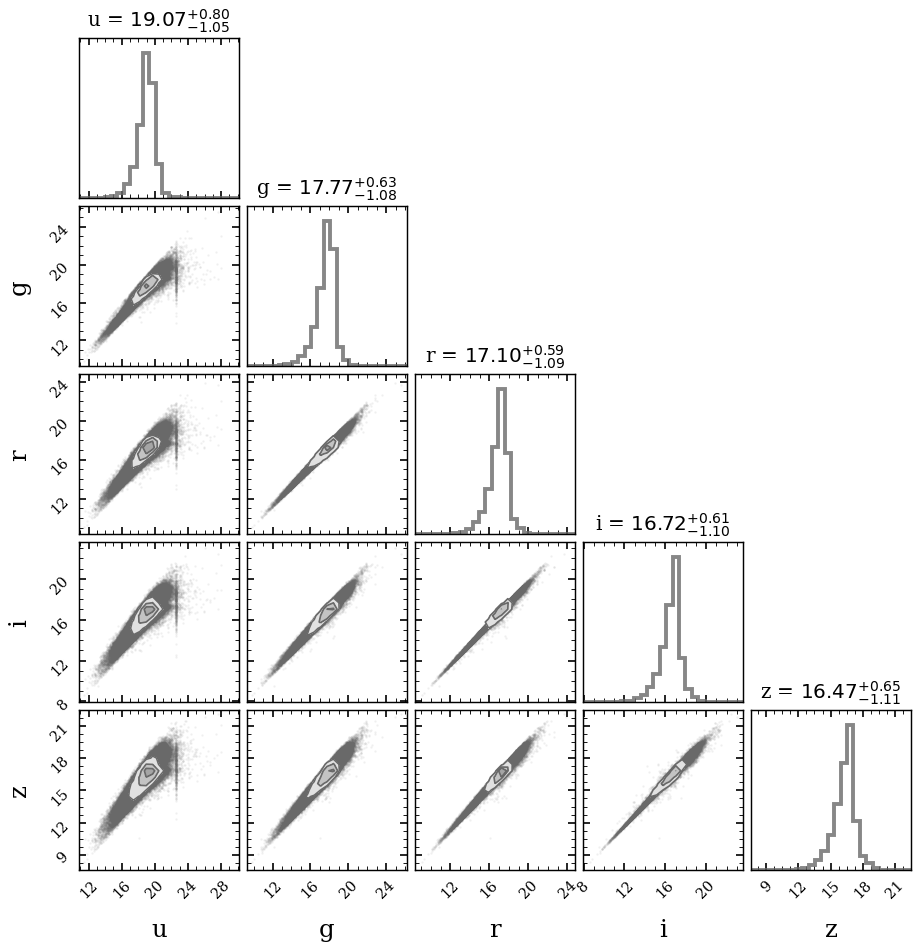

In [64]:
figure = corner.corner(
    mag_data,
    color='dimgray',
    labels=list('ugriz'),
    bins=25,
    smooth=.1,
    fill_contours=True,
    show_titles=True,
    title_kwargs={'fontsize': 18},
    label_kwargs={'fontsize': 22},
    hist_kwargs={'density': True},
    plot_datapoints=True
    )